# Cancer Data - Classification

Kaggle source data: [dataset](https://www.kaggle.com/datasets/erdemtaha/cancer-data)


570 cancer cells and 30 features to determine whether the cancer cells in our data are benign or malignant

Our cancer data contains 2 types of cancers: 1. benign cancer (B) and 2. malignant cancer (M).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load data
orig_data = pd.read_csv('../data/raw/cancer_data.csv')

In [5]:
orig_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
orig_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Missing values and duplicated

Text(0, 0.5, 'variables')

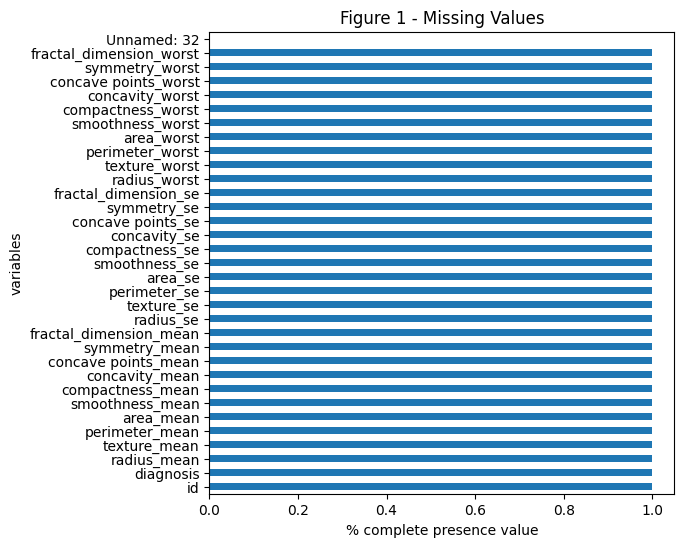

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
(1- orig_data.isnull().mean()).abs().plot.barh(ax=ax)
plt.title('Figure 1 - Missing Values')
plt.xlabel('% complete presence value')
plt.ylabel('variables')

In [8]:
# verify duplicated
orig_data.duplicated().sum()

0

In [9]:
# Removing the columns id and Unnamed
data = orig_data.drop(['id', 'Unnamed: 32'], axis=1)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


I'm changing the variable target diagnosis:  
M - 1  
B - 0

In [10]:
data.diagnosis = data.diagnosis.apply(lambda x: 1 if x=='M' else 0)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


To verify all distribuitions I'll apply a Shapiro-Wilk statistical test to verify that distribuitions can be normal.

In [11]:
for col in data.columns:
    stat, p = shapiro(data[col])
    print(f'{col}:p-value = {p:.4f}')

diagnosis:p-value = 0.0000
radius_mean:p-value = 0.0000
texture_mean:p-value = 0.0000
perimeter_mean:p-value = 0.0000
area_mean:p-value = 0.0000
smoothness_mean:p-value = 0.0001
compactness_mean:p-value = 0.0000
concavity_mean:p-value = 0.0000
concave points_mean:p-value = 0.0000
symmetry_mean:p-value = 0.0000
fractal_dimension_mean:p-value = 0.0000
radius_se:p-value = 0.0000
texture_se:p-value = 0.0000
perimeter_se:p-value = 0.0000
area_se:p-value = 0.0000
smoothness_se:p-value = 0.0000
compactness_se:p-value = 0.0000
concavity_se:p-value = 0.0000
concave points_se:p-value = 0.0000
symmetry_se:p-value = 0.0000
fractal_dimension_se:p-value = 0.0000
radius_worst:p-value = 0.0000
texture_worst:p-value = 0.0000
perimeter_worst:p-value = 0.0000
area_worst:p-value = 0.0000
smoothness_worst:p-value = 0.0002
compactness_worst:p-value = 0.0000
concavity_worst:p-value = 0.0000
concave points_worst:p-value = 0.0000
symmetry_worst:p-value = 0.0000
fractal_dimension_worst:p-value = 0.0000


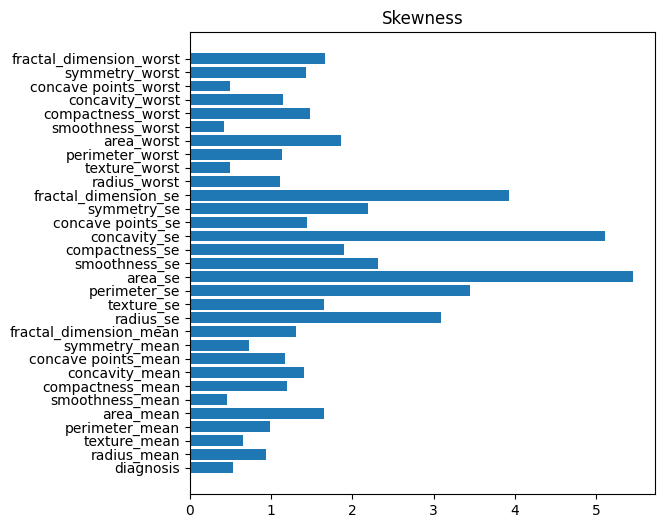

In [12]:
# compute skewness and kurtosis of all variables
plt.figure(figsize=(6,6))
plt.barh(data.skew().index, data.skew().values)
plt.title('Skewness')
plt.show()

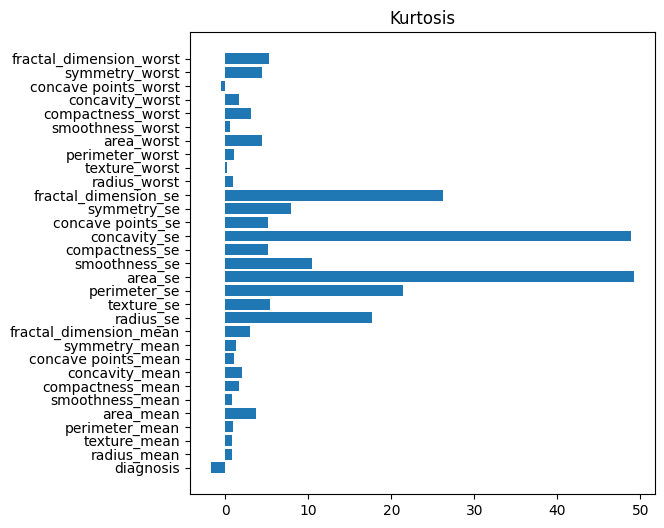

In [13]:
plt.figure(figsize=(6,6))
plt.barh(data.kurtosis().index, data.kurtosis().values)
plt.title('Kurtosis')
plt.show()

### About balancing classes of target

In [14]:
def plot_balanced_class(series):
    value_counts = series.value_counts()
    percentages = value_counts / len(series) * 100
    colors = sns.color_palette('colorblind')
    plt.figure(figsize=(6,4))
    plt.bar(value_counts.index, value_counts.values, color=colors)
    
    # add percentage labels to each bar
    for i, count in enumerate(value_counts):
        percentage = round(percentages[i], 2)
        plt.text(i, count + 0.5, f'{percentage}%', ha='center', fontsize=10)

    # set the title and axis labels
    plt.title('Balanced Class Plot to:'+ series.name)
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.show()

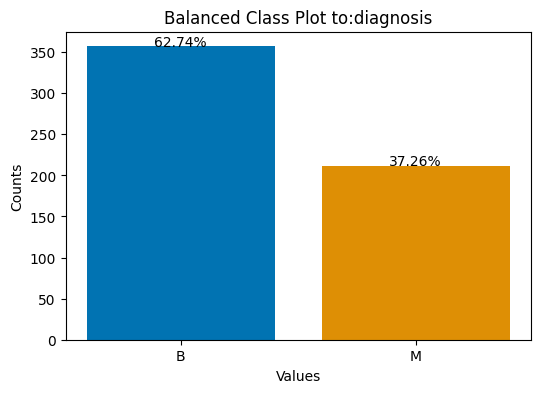

In [15]:
plot_balanced_class(orig_data.diagnosis)

In [16]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Save transformed Data

In [17]:
data.to_csv('../data/interim/data.csv', index=False)